In [1]:
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#change directry
os.chdir('Asian')

In [124]:
#画像のディレクトリ
onlyfiles = os.listdir()

#20〜60かつasianに限定。
shuffle(onlyfiles)
age  = [i.split('_')[0] for i in onlyfiles]
race = [i.split('_')[2] for i in onlyfiles]

age_from_20_to_60_and_Asian_ix = []
for (ag, rc) in zip(age, race):
    ag = int(ag)
    if (20 <= ag) and (ag <= 60) and (rc == '2'):
        age_from_20_to_60_and_Asian_ix.append(True)
    else:
        age_from_20_to_60_and_Asian_ix.append(False)

#20〜60歳の画像数(asianのみ)。
age_from_20_to_60_and_Asian_ix.count(True)

2153

In [6]:
onlyfiles = os.listdir()
#特徴量、ラベル生成。
X_data = []
Y_data = []
for num, file in enumerate(onlyfiles):
    face = cv2.imread(file)
    #もし画素数を変更したいなら。
    #face =cv2.resize(face, (XX, YY) )        
    X_data.append(face)
    #Y_data.append(int(age[num]))

In [11]:
X_data_np = np.array(X_data)
X_data_np[0].shape

(200, 200, 3)

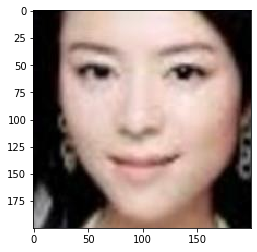

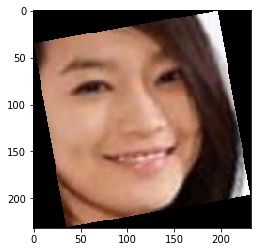

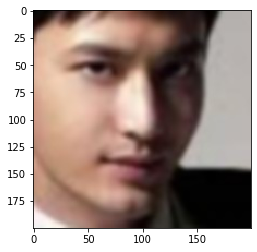

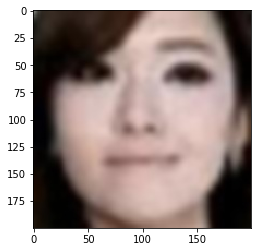

In [8]:
for i in range(0,4):
    rgb = cv2.cvtColor(X_data_np[i], cv2.COLOR_BGR2RGB) #cv2とmatplotlibではカラーの解釈が違う。
    plt.imshow(rgb)
    plt.show()

In [128]:
Y_data_np = np.array(Y_data)
print(Y_data_np.shape)
print(Y_data_np[0:5])

(2153,)
[46 24 35 24 26]


In [129]:
X_data_np[1].shape

(200, 200, 3)

In [132]:
#UTKFaceのAsian(20-60)の顔写真を保存。
for ix in range(len(X_data_np)):
    #cv2.imwrite('/home/tidal/python/UTKface_AgePrediction/Asian/{0}_{1}_old_normal.jpg'.format(ix, Y_data_np[ix]), X_data_np[ix])
    cv2.imwrite('C:\\Users\\hfuis\\python\\UTKface_AgePrediction\\Asian\\{0}_{1}_old_normal.jpg'.format(ix, Y_data_np[ix]), X_data_np[ix])

In [6]:
#標準
#0_32old_normal.jpg

In [136]:
#Asianの標準画像読み出し
def load_Asian_face_and_age():
    X_data = []
    Y_data = []
    os.chdir('C:\\Users\\hfuis\\python\\UTKface_AgePrediction\\Asian')
    Asian_files = os.listdir()
    age  = [i.split('_')[1] for i in Asian_files]
    for num, file in enumerate(Asian_files):
        face = cv2.imread(file)
        X_data.append(face)
        Y_data.append(int(age[num]))
    return X_data, Y_data

#画像の表示
def display_img(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cv2とmatplotlibではカラーの解釈が違う。
    plt.imshow(rgb)
    plt.show()

#画像の書き込み
def write_to_Asian(img_mtx, age_mtx, process):
    for ix in range(len(img_mtx)):
        cv2.imwrite('C:\\Users\\hfuis\\python\\UTKface_AgePrediction\\Asian\\{0}_{1}_old_{2}.jpg'.format(ix, age_mtx[ix],process), img_mtx[ix])


In [134]:
X_data, Y_data = load_Asian_face_and_age()

In [92]:
X_data_np = np.array(X_data)
X_data_np.shape

(2153, 200, 200, 3)

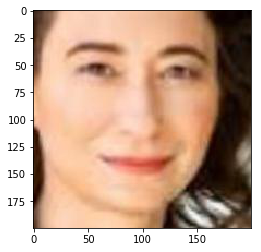

In [137]:
display_img(X_data[0])

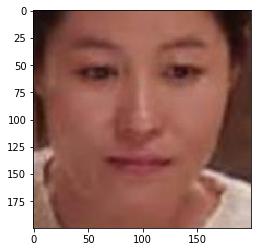

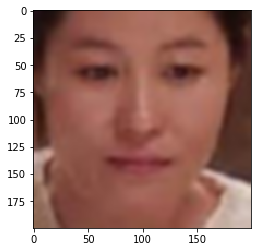

In [138]:
#ぼかし(ローパスフィルタ, 5*5)
kernel = np.ones((5,5),np.float32)/25
img_mtx = []
for num in range(len(X_data)):
    dst = cv2.filter2D(X_data[num],-1,kernel)
    img_mtx.append(dst)
write_to_Asian(img_mtx, Y_data, "LPF_25")
display_img(X_data[len(X_data)-1])
display_img(dst)

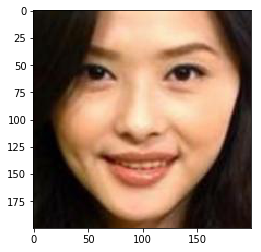

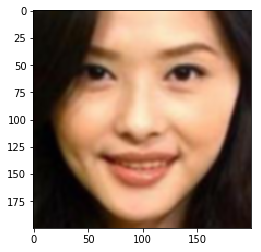

In [110]:
#ぼかし(ガウシアンフィルタ)
blur = cv2.GaussianBlur(X_data[0],(5,5),0)
display_img(X_data[0])
display_img(blur)

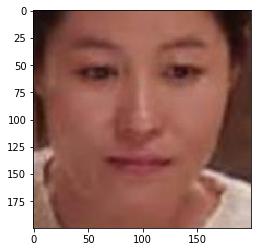

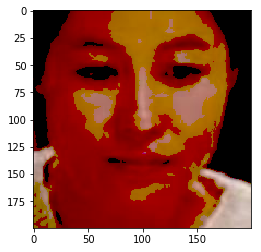

In [140]:
#閾値処理
img_mtx = []
for num in range(len(X_data)):
    img_thr = cv2.threshold(X_data[num], 100, 255, cv2.THRESH_TOZERO)[1]
    img_mtx.append(img_thr)
write_to_Asian(img_mtx, Y_data, "threshold_100_255_THRESH_TOZERO")
display_img(X_data[len(X_data)-1])
display_img(img_thr)

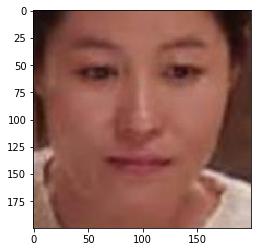

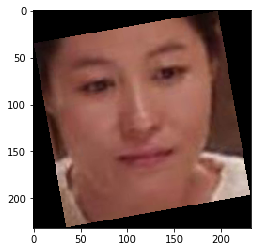

In [141]:
#回転
img_mtx = []
ang = 10
for num in range(len(X_data)):
    img_rot = ndimage.rotate(X_data[num],ang)
    img_mtx.append(img_rot)
write_to_Asian(img_mtx, Y_data, "rotate_10")
display_img(X_data[len(X_data)-1])
display_img(img_rot)